In [7]:
import librosa
import librosa.display as librosa_display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchaudio
import torch

In [8]:
birds = pd.read_csv('bird_songs_metadata.csv')
birds.head()

id       genus   species subspecies           name  \
0  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
1  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
2  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
3  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
4  557838  Thryomanes  bewickii        NaN  Bewick's Wren   

                recordist        country  \
0  Whitney Neufeld-Kaiser  United States   
1  Whitney Neufeld-Kaiser  United States   
2  Whitney Neufeld-Kaiser  United States   
3  Whitney Neufeld-Kaiser  United States   
4  Whitney Neufeld-Kaiser  United States   

                                  location  latitude  longitude altitude  \
0  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
1  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
2  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
3  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
4  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   

                   sound_type                   source_url  \
0  adult, sex uncertain, song  //www.xeno-canto.org/557838   
1  adult, sex uncertain, song  //www.xeno-canto.org/557838   
2  adult, sex uncertain, song  //www.xeno-canto.org/557838   
3  adult, sex uncertain, song  //www.xeno-canto.org/557838   
4  adult, sex uncertain, song  //www.xeno-canto.org/557838   

                                        license   time        date  \
0  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
1  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
2  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
3  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
4  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   

                                             remarks      filename  
0  Recorded with Voice Record Pro on iPhone7, nor...  557838-0.wav  
1  Recorded with Voice Record Pro on iPhone7, nor...  557838-1.wav  
2  Recorded with Voice Record Pro on iPhone7, nor...  557838-4.wav  
3  Recorded with Voice Record Pro on iPhone7, nor...  557838-5.wav  
4  Recorded with Voice Record Pro on iPhone7, nor...  557838-6.wav

In [9]:
birds = birds[['id', 'name', 'filename']]
birds.head()

id           name      filename
0  557838  Bewick's Wren  557838-0.wav
1  557838  Bewick's Wren  557838-1.wav
2  557838  Bewick's Wren  557838-4.wav
3  557838  Bewick's Wren  557838-5.wav
4  557838  Bewick's Wren  557838-6.wav

(array([ 893.,    0., 1182.,    0.,    0., 1017.,    0., 1256.,    0.,
        1074.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

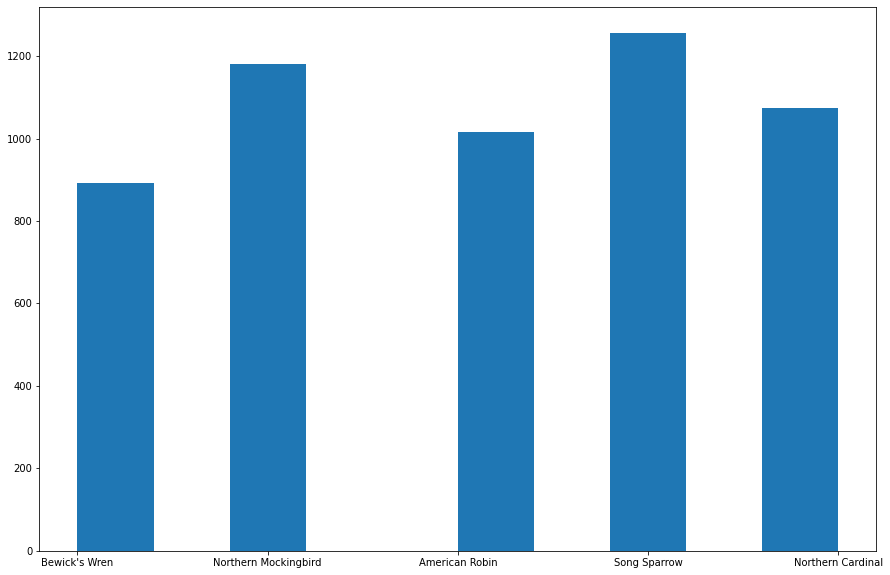

In [10]:
plt.figure(figsize=(15, 10))
plt.hist(birds['name'])

In [11]:
import pickle
from pathlib import Path

In [12]:
path = Path('wavfiles')

In [13]:
from tqdm import tqdm

speechs = []
for file_name in tqdm(birds['filename']):
    path_ = path / file_name
    
    wave, sample_rate = librosa.load(path_)
    wave, _ = librosa.effects.trim(wave)
    feature = librosa.feature.chroma_cens(y=wave, sr=sample_rate)
    speechs.append(feature)

with open("speechs.txt", "wb") as fp:   #Pickling
    pickle.dump(speechs, fp)

 12%|█████████▏                                                                     | 628/5422 [01:22<10:37,  7.52it/s]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
 19%|██████████████▉                                                               | 1042/5422 [02:17<09:33,  7.63it/s]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1010
  warnings.warn(
 42%|████████████████████████████████▌                                             | 2261/5422 [05:03<06:45,  7.79it/s]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(
 53%|███████████████████████████████

In [14]:
with open("speechs.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [15]:
speechs = b

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [17]:
names = list(set(birds['name']))
names

['Song Sparrow',
 'Northern Mockingbird',
 'Northern Cardinal',
 "Bewick's Wren",
 'American Robin']

In [18]:
birds['name_id'] = birds['name'].apply(lambda x: names.index(x))
birds

id               name      filename  name_id
0     557838      Bewick's Wren  557838-0.wav        3
1     557838      Bewick's Wren  557838-1.wav        3
2     557838      Bewick's Wren  557838-4.wav        3
3     557838      Bewick's Wren  557838-5.wav        3
4     557838      Bewick's Wren  557838-6.wav        3
...      ...                ...           ...      ...
5417   11713  Northern Cardinal   11713-8.wav        2
5418   11713  Northern Cardinal  11713-10.wav        2
5419   11713  Northern Cardinal  11713-14.wav        2
5420   11713  Northern Cardinal  11713-15.wav        2
5421   11713  Northern Cardinal  11713-16.wav        2

[5422 rows x 4 columns]

In [19]:
birds['speechs'] = speechs
birds['speechs'] = birds['speechs'].apply(lambda x: x.reshape(np.product(x.shape)))
birds

id               name      filename  name_id  \
0     557838      Bewick's Wren  557838-0.wav        3   
1     557838      Bewick's Wren  557838-1.wav        3   
2     557838      Bewick's Wren  557838-4.wav        3   
3     557838      Bewick's Wren  557838-5.wav        3   
4     557838      Bewick's Wren  557838-6.wav        3   
...      ...                ...           ...      ...   
5417   11713  Northern Cardinal   11713-8.wav        2   
5418   11713  Northern Cardinal  11713-10.wav        2   
5419   11713  Northern Cardinal  11713-14.wav        2   
5420   11713  Northern Cardinal  11713-15.wav        2   
5421   11713  Northern Cardinal  11713-16.wav        2   

                                                speechs  
0     [0.22453869088539227, 0.22494374087807, 0.2253...  
1     [0.07495413423220985, 0.08262761908604573, 0.0...  
2     [0.21277444343537885, 0.21351968461371215, 0.2...  
3     [0.2247085887315143, 0.22502095446236325, 0.22...  
4     [0.2318111682618879, 0.2319182008855577, 0.231...  
...                                                 ...  
5417  [0.22369816252274327, 0.22558206646263, 0.2277...  
5418  [0.34724565984258987, 0.35415184428830554, 0.3...  
5419  [0.23979437644645252, 0.241015469254964, 0.243...  
5420  [0.2925797122672924, 0.2985225080081112, 0.304...  
5421  [0.25647238283464735, 0.25688081910268085, 0.2...  

[5422 rows x 5 columns]

In [20]:
birds['len'] = birds['speechs'].apply(lambda x: len(x))
birds

id               name      filename  name_id  \
0     557838      Bewick's Wren  557838-0.wav        3   
1     557838      Bewick's Wren  557838-1.wav        3   
2     557838      Bewick's Wren  557838-4.wav        3   
3     557838      Bewick's Wren  557838-5.wav        3   
4     557838      Bewick's Wren  557838-6.wav        3   
...      ...                ...           ...      ...   
5417   11713  Northern Cardinal   11713-8.wav        2   
5418   11713  Northern Cardinal  11713-10.wav        2   
5419   11713  Northern Cardinal  11713-14.wav        2   
5420   11713  Northern Cardinal  11713-15.wav        2   
5421   11713  Northern Cardinal  11713-16.wav        2   

                                                speechs   len  
0     [0.22453869088539227, 0.22494374087807, 0.2253...  1560  
1     [0.07495413423220985, 0.08262761908604573, 0.0...  1560  
2     [0.21277444343537885, 0.21351968461371215, 0.2...  1560  
3     [0.2247085887315143, 0.22502095446236325, 0.22...  1560  
4     [0.2318111682618879, 0.2319182008855577, 0.231...  1560  
...                                                 ...   ...  
5417  [0.22369816252274327, 0.22558206646263, 0.2277...  1560  
5418  [0.34724565984258987, 0.35415184428830554, 0.3...  1560  
5419  [0.23979437644645252, 0.241015469254964, 0.243...  1560  
5420  [0.2925797122672924, 0.2985225080081112, 0.304...  1560  
5421  [0.25647238283464735, 0.25688081910268085, 0.2...  1560  

[5422 rows x 6 columns]

In [21]:
birds = birds[birds['len'] == 1560]
birds

id               name      filename  name_id  \
0     557838      Bewick's Wren  557838-0.wav        3   
1     557838      Bewick's Wren  557838-1.wav        3   
2     557838      Bewick's Wren  557838-4.wav        3   
3     557838      Bewick's Wren  557838-5.wav        3   
4     557838      Bewick's Wren  557838-6.wav        3   
...      ...                ...           ...      ...   
5417   11713  Northern Cardinal   11713-8.wav        2   
5418   11713  Northern Cardinal  11713-10.wav        2   
5419   11713  Northern Cardinal  11713-14.wav        2   
5420   11713  Northern Cardinal  11713-15.wav        2   
5421   11713  Northern Cardinal  11713-16.wav        2   

                                                speechs   len  
0     [0.22453869088539227, 0.22494374087807, 0.2253...  1560  
1     [0.07495413423220985, 0.08262761908604573, 0.0...  1560  
2     [0.21277444343537885, 0.21351968461371215, 0.2...  1560  
3     [0.2247085887315143, 0.22502095446236325, 0.22...  1560  
4     [0.2318111682618879, 0.2319182008855577, 0.231...  1560  
...                                                 ...   ...  
5417  [0.22369816252274327, 0.22558206646263, 0.2277...  1560  
5418  [0.34724565984258987, 0.35415184428830554, 0.3...  1560  
5419  [0.23979437644645252, 0.241015469254964, 0.243...  1560  
5420  [0.2925797122672924, 0.2985225080081112, 0.304...  1560  
5421  [0.25647238283464735, 0.25688081910268085, 0.2...  1560  

[5413 rows x 6 columns]

In [22]:
from sklearn.utils import shuffle
birds = shuffle(birds)
birds['name_id']

912     1
3790    0
4264    0
4356    2
2554    4
       ..
3331    0
1366    1
2121    4
171     3
2202    4
Name: name_id, Length: 5413, dtype: int64

In [23]:
knn_clf.fit(birds['speechs'].tolist(),birds['name_id'].tolist()) 

KNeighborsClassifier()

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


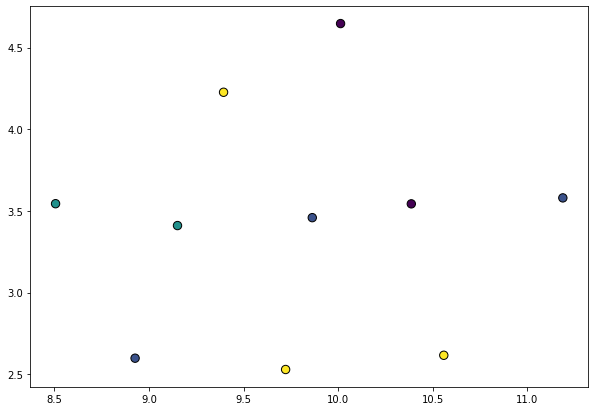

In [24]:
import umap

embs = umap.UMAP().fit_transform(birds['speechs'][:10].tolist())
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'][:10], s=70, edgecolor="k")
plt.show()

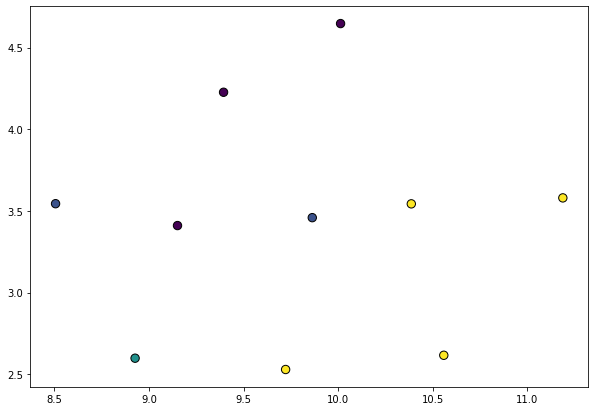

In [25]:
y_pred = knn_clf.predict(birds['speechs'][:10].tolist())
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

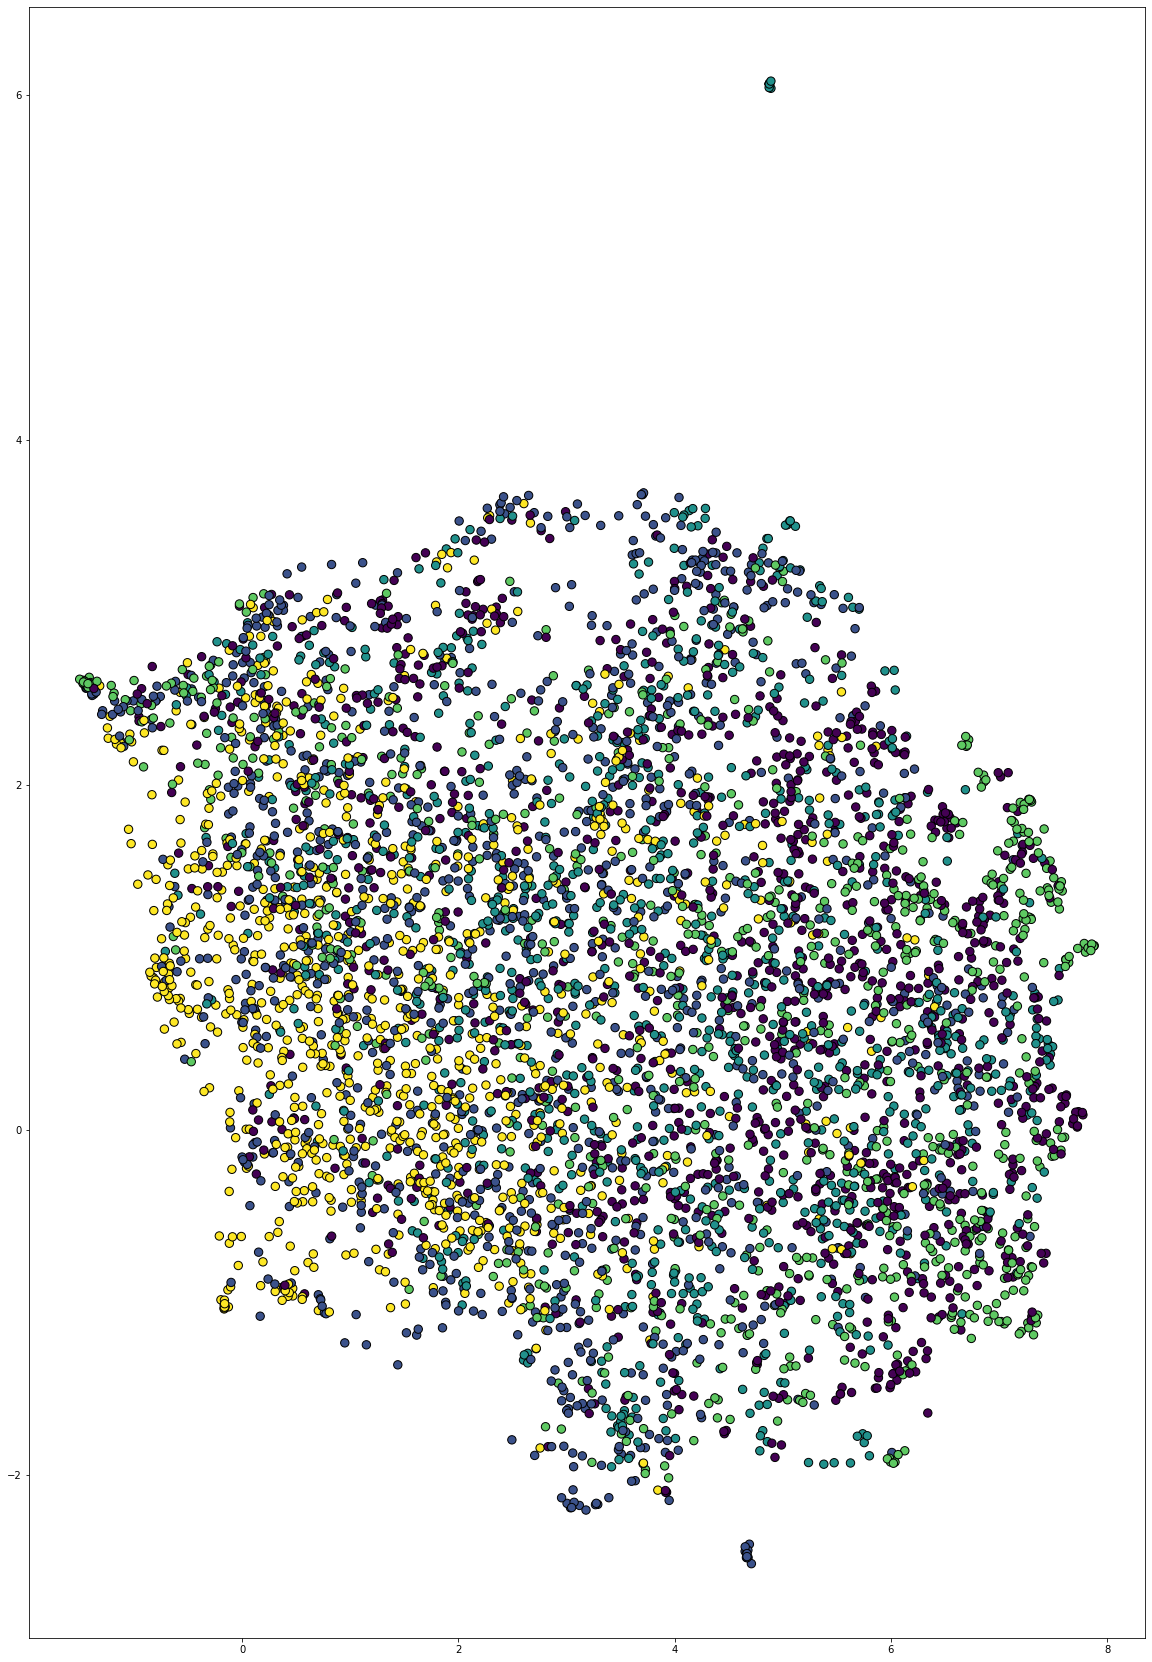

In [26]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(birds['speechs'].tolist())
embs = umap.UMAP().fit_transform(birds['speechs'].tolist())
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'], s=70, edgecolor="k")
plt.show()

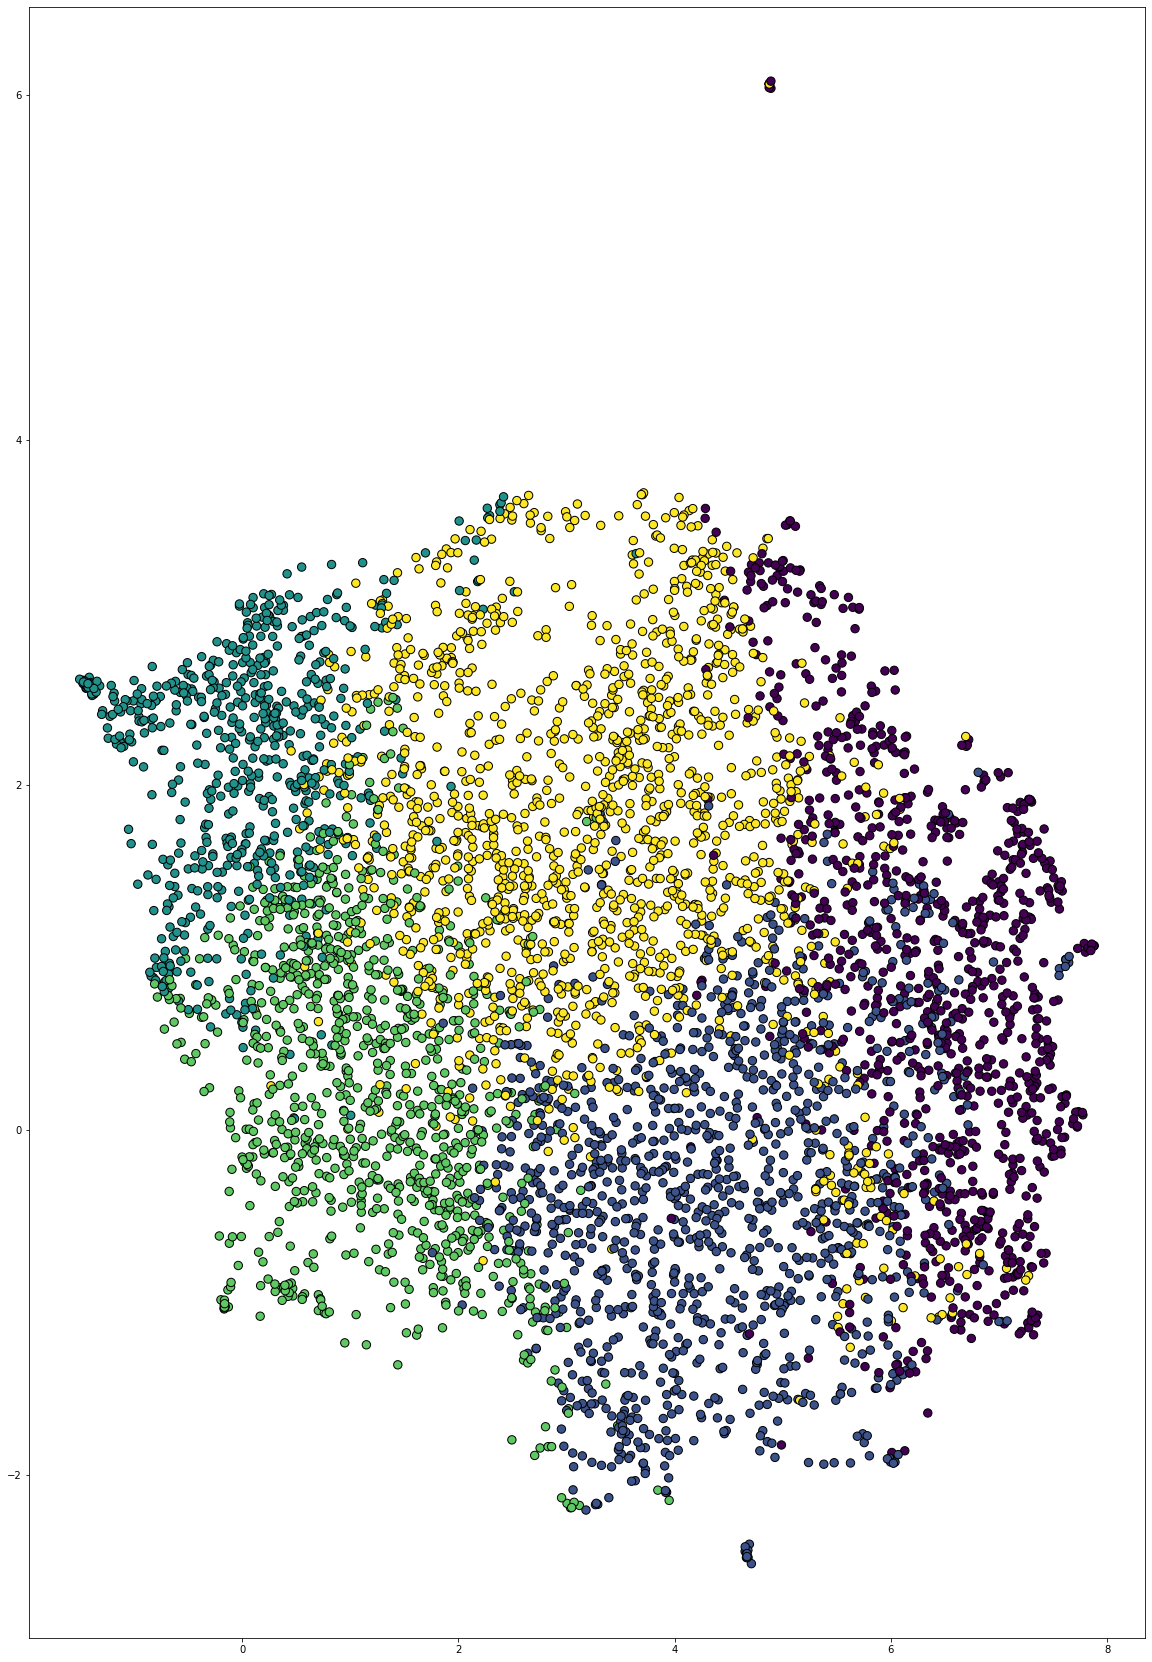

In [27]:
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

In [28]:
query = birds.loc[10]
query

id                                                     557838
name                                            Bewick's Wren
filename                                        557838-17.wav
name_id                                                     3
speechs     [0.2305372661146904, 0.2305405653887818, 0.230...
len                                                      1560
Name: 10, dtype: object

In [29]:
import IPython

IPython.display.Audio(path / query['filename'])

In [30]:
query = birds.loc[0]
query

id                                                     557838
name                                            Bewick's Wren
filename                                         557838-0.wav
name_id                                                     3
speechs     [0.22453869088539227, 0.22494374087807, 0.2253...
len                                                      1560
Name: 0, dtype: object

In [31]:
IPython.display.Audio(path / query['filename'])

In [32]:
import sklearn

query = birds.loc[0]

def find_simmilar(query):
    birds['MSE'] = birds.apply(lambda bird: sklearn.metrics.mean_squared_error(bird['speechs'], query['speechs']), axis=1)

In [33]:
find_simmilar(query)
birds.sort_values(by=['MSE'], ascending=True, inplace=True)
birds.head(10)

id                  name       filename  name_id  \
0     557838         Bewick's Wren   557838-0.wav        3   
10    557838         Bewick's Wren  557838-17.wav        3   
1877   57040  Northern Mockingbird    57040-9.wav        1   
2295  464766        American Robin  464766-14.wav        4   
4     557838         Bewick's Wren   557838-6.wav        3   
993   541496  Northern Mockingbird   541496-8.wav        1   
1684  232710  Northern Mockingbird   232710-7.wav        1   
1873   57040  Northern Mockingbird    57040-5.wav        1   
992   541496  Northern Mockingbird   541496-7.wav        1   
1     557838         Bewick's Wren   557838-1.wav        3   

                                                speechs   len       MSE  
0     [0.22453869088539227, 0.22494374087807, 0.2253...  1560  0.000000  
10    [0.2305372661146904, 0.2305405653887818, 0.230...  1560  0.000487  
1877  [0.22180635938210586, 0.22221486403411103, 0.2...  1560  0.009009  
2295  [0.22371946006729895, 0.22570466223091298, 0.2...  1560  0.011477  
4     [0.2318111682618879, 0.2319182008855577, 0.231...  1560  0.011606  
993   [0.35664154649481467, 0.3533071146470416, 0.34...  1560  0.011728  
1684  [0.2437283393924145, 0.24736715209781235, 0.25...  1560  0.011752  
1873  [0.17521770148471455, 0.1803890551865302, 0.18...  1560  0.011752  
992   [0.23611463672081048, 0.2353979020363294, 0.23...  1560  0.011759  
1     [0.07495413423220985, 0.08262761908604573, 0.0...  1560  0.011964

In [34]:
ans = birds.iloc[2]
ans

id                                                      57040
name                                     Northern Mockingbird
filename                                          57040-9.wav
name_id                                                     1
speechs     [0.22180635938210586, 0.22221486403411103, 0.2...
len                                                      1560
MSE                                                  0.009009
Name: 1877, dtype: object

In [35]:
IPython.display.Audio(path / ans['filename'])

In [36]:
ans = birds.iloc[3]
IPython.display.Audio(path / ans['filename'])

In [37]:
ans = birds.iloc[5]
IPython.display.Audio(path / ans['filename'])